In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
tau_m = 20  # ms, membrane time constant
V_rest = -70  # mV, resting membrane potential
R_m = 10  # MΩ, membrane resistance
V_threshold = -55  # mV, threshold potential for spiking
V_reset = -75  # mV, reset potential after a spike
omega = 1.0  # Hz, frequency of the input current
duration = 200  # ms, total simulation time
dt = 0.1  # ms, time step for the simulation
time = np.arange(0, duration, dt)  # array representing time points from 0 to duration with step dt

# Initialize the input current I(t)
# A_values represents the amplitude of the input current for different time intervals
A_values = [0, 100, 200, 0]
I = np.zeros_like(time)  # Initialize the input current array with zeros

# Assign the input current I(t) with cosine modulation
for i, A in enumerate(A_values):
    start = int(i * 50 / dt)  # start index for each 50 ms interval
    end = int((i + 1) * 50 / dt)  # end index for each 50 ms interval
    # Assign cosine current with amplitude A and frequency omega to the current array
    I[start:end] = A * np.cos(omega *  time[start:end])

# Initialize the membrane potential V with the resting potential
V = np.ones_like(time) * V_rest

# Simulate the LIF model
for t in range(1, len(time)):
    # Calculate the change in membrane potential dV using the LIF equation
    dV = dt / tau_m * (-(V[t-1] - V_rest) + R_m * I[t-1])
    # Update the membrane potential
    V[t] = V[t-1] + dV
    # Check if the membrane potential has reached the threshold
    if V[t] >= V_threshold:
        V[t] = V_reset  # Reset the membrane potential if it has reached the threshold

def plotting():
 # Plot the results
 plt.figure(figsize=(12, 6))

 # Plot the input current I(t)
 plt.subplot(2, 1, 1)
 plt.plot(time, I, label='Input Current I(t)')
 plt.ylabel('I(t) (nA)')
 plt.title('Input Current')
 plt.legend()

 # Plot the membrane potential V
 plt.subplot(2, 1, 2)
 plt.plot(time, V, label='Membrane Potential V')
 plt.ylabel('V (mV)')
 plt.xlabel('Time (ms)')
 plt.title('Membrane Potential')
 plt.legend()

 plt.tight_layout()
 plt.show()


def plot_zoomed_section(zoom_start, zoom_end):
    plt.figure(figsize=(8, 4))
    plt.plot(time, V, label='Membrane Potential V')
    plt.ylabel('V (mV)')
    plt.xlabel('Time (ms)')
    plt.title('Zoomed-in Membrane Potential')
    plt.xlim(zoom_start, zoom_end)
    plt.figure(figsize=(8, 4))
    plt.plot(time, I, label='Input Current I(t)')
    plt.ylabel('I(t) (nA)')
    plt.xlabel('Time (ms)')
    plt.title('Zoomed-in Input Current')
    plt.xlim(zoom_start, zoom_end)
    plt.legend()
    plt.tight_layout()
    plt.show()

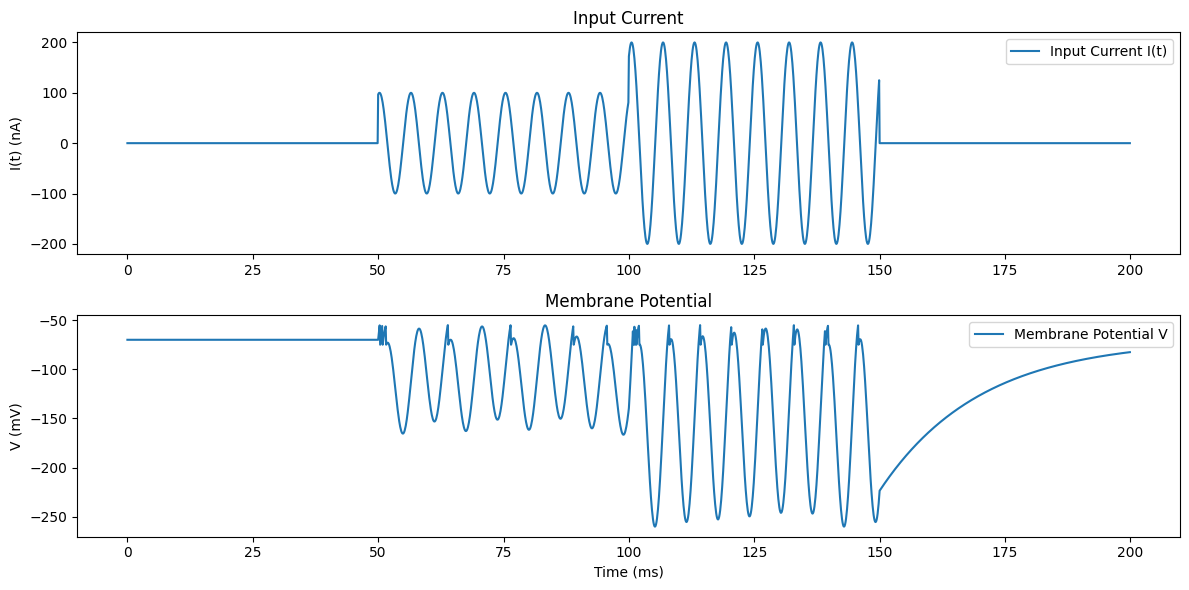

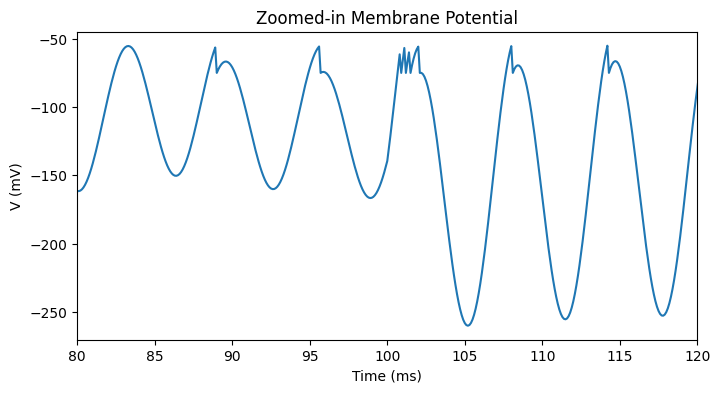

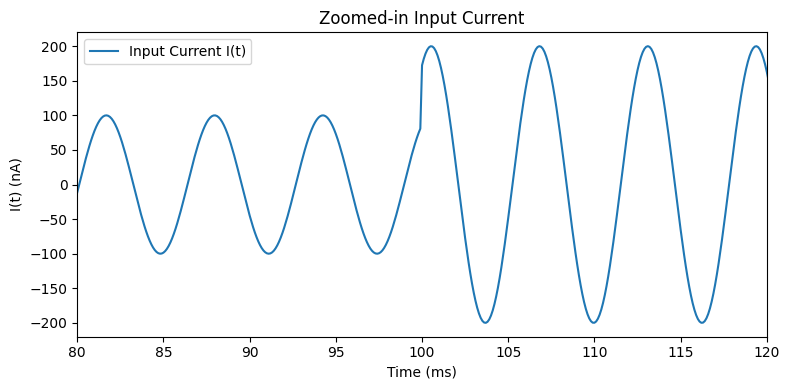

In [ ]:
plotting()
plot_zoomed_section(80,120 )